In [1]:
from SimPEG import Mesh, EM, np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('classic')
import sys
sys.path.append("../../util_codes/")
from View import DataView
import copy
from ipywidgets import *
# ['magma', 'inferno', 'plasma', 'viridis']

/Users/sgkang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


#  Set-up DataView using EM analytic functions

In [2]:
#EM.Analytics.E_from_ElectricDipoleWholeSpace??

In [3]:
x = np.linspace(-50., 50., 200)
y = np.linspace(-50., 50., 200)
ED_full = DataView()
ED_galvanic = DataView()
ED_inductive = DataView()
sigvec = np.logspace(-4,4,100)
fvec = np.logspace(-4,8,100)
sigind, find = 0, 0
# sigind, find = 10, 80, 
srcLoc = np.r_[0., 0., 0.] # source location
sig, f = sigvec[sigind], np.r_[fvec[find]]  # conductivity (S/m), frequency (Hz)
ED_full.set_xyz(x,y, np.r_[0.], normal="Z") # set plane and locations ... 
ED_full.eval_2D(srcLoc, sig, f, "x", EM.Analytics.E_from_ElectricDipoleWholeSpace) # evaluate
ED_galvanic.set_xyz(x,y, np.r_[0.], normal="Z") # set plane and locations ... 
ED_galvanic.eval_2D(srcLoc, sig, f, "x", EM.Analytics.E_galvanic_from_ElectricDipoleWholeSpace) # evaluate
ED_inductive.set_xyz(x,y, np.r_[0.], normal="Z") # set plane and locations ... 
ED_inductive.eval_2D(srcLoc, sig, f, "x", EM.Analytics.E_inductive_from_ElectricDipoleWholeSpace) # evaluate

In [ ]:
xloc, yloc, zloc = 10, 0, ED_full.z
fig = plt.figure(figsize=(6.5*3, 5))
ax0, ax1, ax2 = plt.subplot(131), plt.subplot(132), plt.subplot(133)
ax0, dat0 = ED_full.plot2D_FD(ax=ax0,component="real",view="vec", logamp=True, ncontour=100, showcontour=False, colorbar=False, cmap="jet")
vmin, vmax = dat0.cvalues.min(), dat0.cvalues.max()
clim = [vmin, vmax]
ax1, dat1 = ED_galvanic.plot2D_FD(ax=ax1,component="real",view="vec", logamp=True, ncontour=100, showcontour=False, colorbar=False, clim=clim, cmap="jet")
ax2, dat2 = ED_inductive.plot2D_FD(ax=ax2,component="real",view="vec", logamp=True, ncontour=100, showcontour=False, colorbar=False, clim=clim, cmap="jet")
axs = [ax0, ax1, ax2]
dats = [dat0, dat1, dat2]
titles = ["E total", "E galvanic", "E inductive"]
for i in range(3):
    axs[i].plot(xloc, yloc, 'rx', ms=10, markeredgewidth=2)
    axs[i].set_title(titles[i])
    cb = plt.colorbar(dats[0],ax=axs[i], format="$10^{%.1f}$", ticks=np.linspace(vmin, vmax, 3))

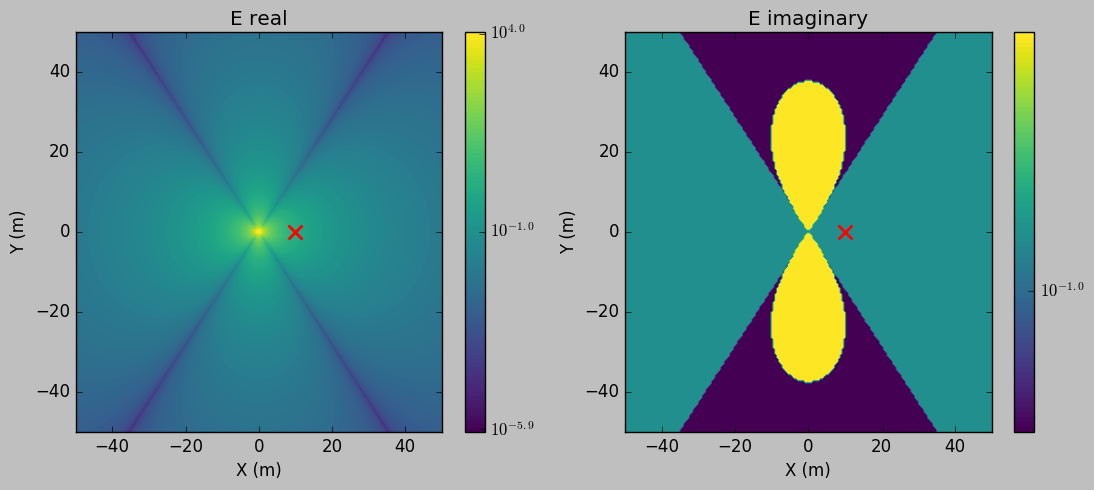

In [60]:
xloc, yloc, zloc = 10, 0, ED_full.z
fig = plt.figure(figsize=(6.5*2, 5))
ax0, ax1 = plt.subplot(121), plt.subplot(122)
ax0, dat0 = ED_full.plot2D_FD(ax=ax0,component="amplitude",view="x", logamp=True, ncontour=100, showcontour=False, colorbar=False, cmap="viridis")
vmin, vmax = dat0.cvalues.min(), dat0.cvalues.max()
clim = [vmin, vmax]
ax1, dat1 = ED_full.plot2D_FD(ax=ax1,component="phase",view="x", logamp=False, ncontour=100, showcontour=False, colorbar=False, cmap="viridis")
axs = [ax0, ax1]
dats = [dat0, dat1]
titles = ["E real", "E imaginary"]
for i in range(2):
    axs[i].plot(xloc, yloc, 'rx', ms=10, markeredgewidth=2)
    axs[i].set_title(titles[i])
    cb = plt.colorbar(dats[i],ax=axs[i], format="$10^{%.1f}$", ticks=np.linspace(vmin, vmax, 3))

In [61]:
obsLoc=np.c_[xloc, yloc, zloc]
ED_full.eval_loc(srcLoc, obsLoc, sigvec, fvec, "x", EM.Analytics.E_galvanic_from_ElectricDipoleWholeSpace)

In [62]:
# absloc, coordloc = xloc, yloc
# fig = plt.figure()
# ax0 = plt.subplot(111)
# ax1 = ax0.twinx()
# ax0, ax1 = self.plot_1D_RI_f_x(absloc,coordloc,ax0,ax1,sigind)
# tempfunc = lambda sigind: self.plot_1D_RI_f_x(absloc,coordloc,ax0,ax1,sigind)
# sigslider = IntSlider(min=0, max =len(sigvec)-1, step=1,value=sigind)
# interact(tempfunc, sigind=sigslider)

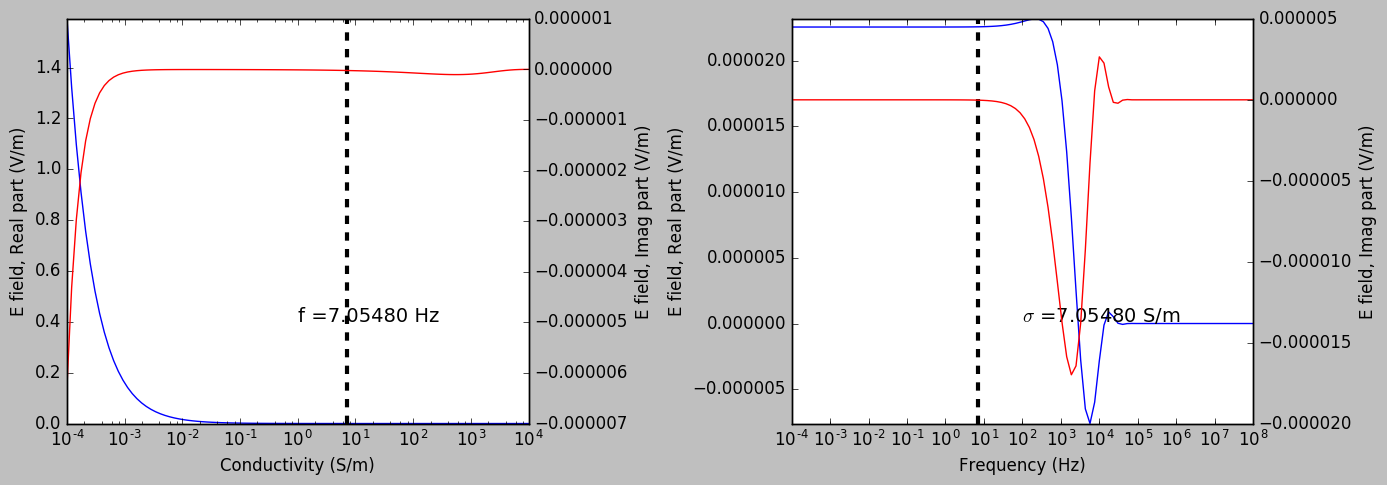

In [63]:
sigslider = IntSlider(min=0, max =len(sigvec)-1, step=10,value=sigind)
freqslider = IntSlider(min=0, max =len(fvec)-1, step=10,value=find)
# obslocx = IntSlider(min=-100, max =100, step=1,value=0)
# obslocy = IntSlider(min=-100, max =100, step=1,value=0)
# obslocz = IntSlider(min=-100, max =100, step=1,value=1)
mode = ToggleButtons(options=['RI','AP'],value='RI')
# obslocx,obslocy,obslocz,sigind,freqind,mode
tempfunc = lambda sigind, freqind, mode: ED_full.plot_1D_x(xloc,yloc,zloc,sigind, freqind, mode)
interact(tempfunc,sigind=sigslider,freqind=freqslider,mode=mode)

In [10]:
print 500*np.sqrt(1./fvec[183]/sigvec[sigind])

0.881457059048


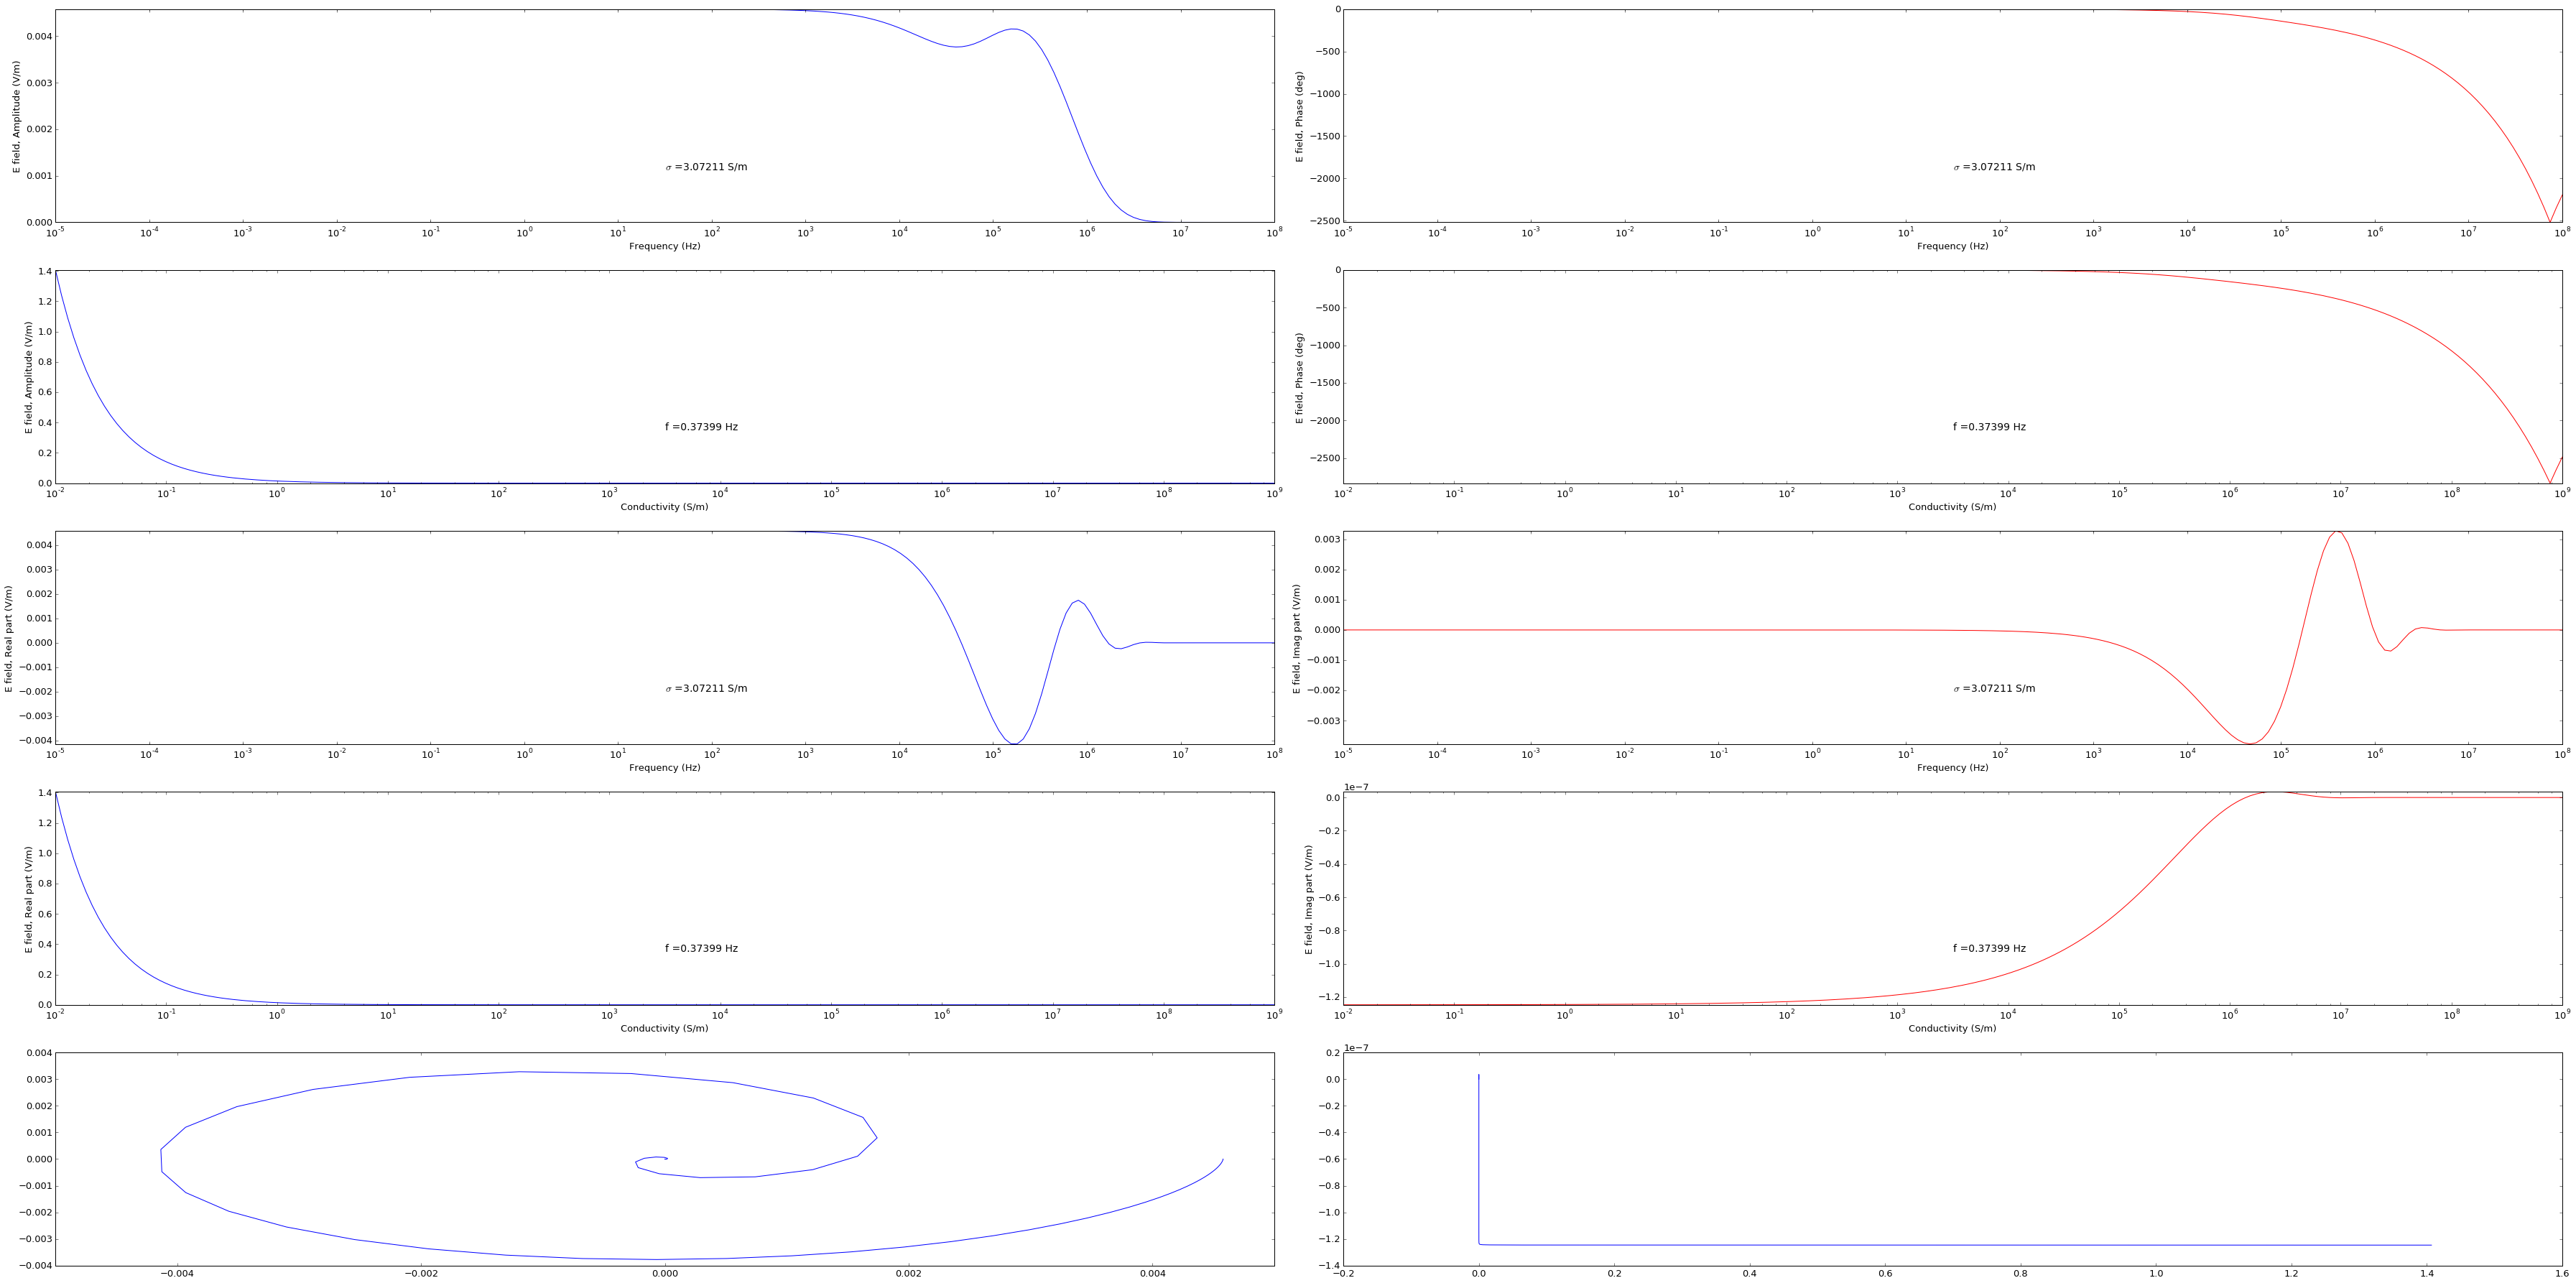

In [26]:
sigind=45
freqind=70

absloc=1.
coordloc=1.

figfig = plt.figure(figsize=(50,25))
ax0 = plt.subplot(521)
ax1 = plt.subplot(522)
ax2 = plt.subplot(523)
ax3 = plt.subplot(524)
ax4 = plt.subplot(525)
ax5 = plt.subplot(526)
ax6 = plt.subplot(527)
ax7 = plt.subplot(528)
ax8 = plt.subplot(529)
ax9 = plt.subplot(5,2,10)

ax0,ax1 = self.plot_1D_AP_f_x(absloc,coordloc,ax0,ax1,sigind)
ax2,ax3 = self.plot_1D_AP_sig_x(absloc,coordloc,ax2,ax3,freqind)
ax4,ax5 = self.plot_1D_RI_f_x(absloc,coordloc,ax4,ax5,sigind)
ax6,ax7 = self.plot_1D_RI_sig_x(absloc,coordloc,ax6,ax7,freqind)
ax8 = self.plot_1D_phasor_f_x(absloc,coordloc,ax8,sigind)
ax9 = self.plot_1D_phasor_sig_x(absloc,coordloc,ax9,freqind)

plt.tight_layout()

In [33]:
# fig = plt.figure()
# ax0 = plt.subplot(111)
# ax1 = ax0.twinx()
# ax0, ax1 = self.plot_1D_AP_f_x(absloc,coordloc,ax0,ax1,sigind)

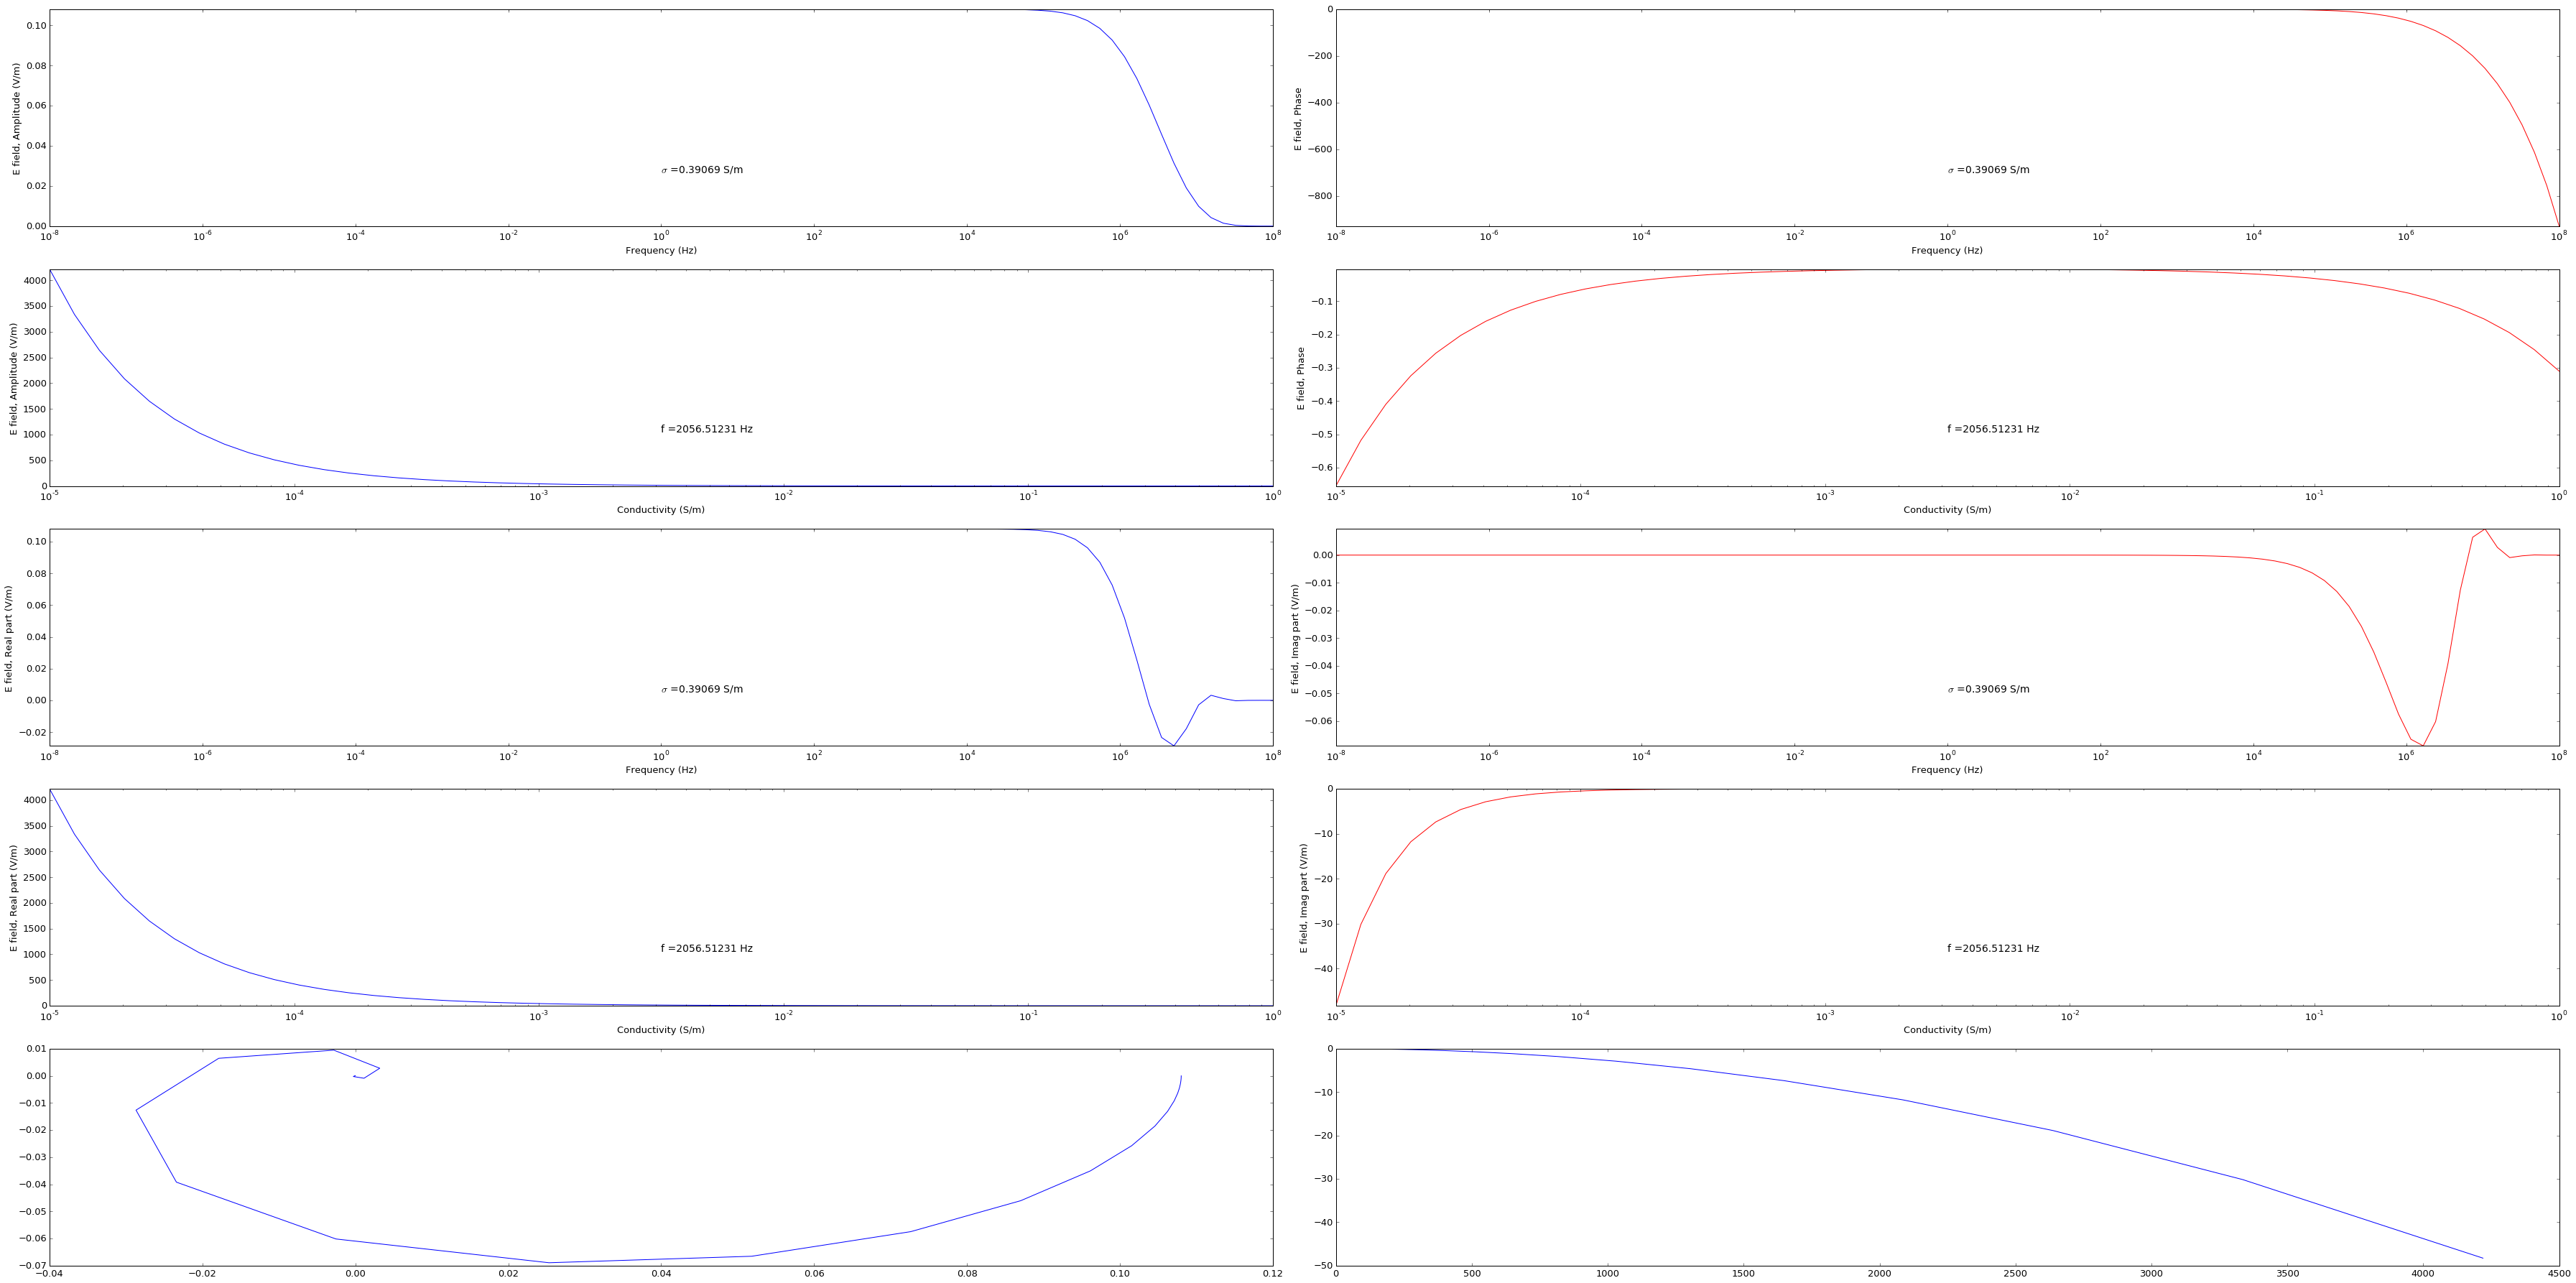

In [8]:
sigind=45
freqind=70

absloc=1.
coordloc=1.

figfig = plt.figure(figsize=(50,25))
ax0 = plt.subplot(521)
ax1 = plt.subplot(522)
ax2 = plt.subplot(523)
ax3 = plt.subplot(524)
ax4 = plt.subplot(525)
ax5 = plt.subplot(526)
ax6 = plt.subplot(527)
ax7 = plt.subplot(528)
ax8 = plt.subplot(529)
ax9 = plt.subplot(5,2,10)

ax0,ax1 = self.plot_1D_AP_f_y(absloc,coordloc,ax0,ax1,sigind)
ax2,ax3 = self.plot_1D_AP_sig_y(absloc,coordloc,ax2,ax3,freqind)
ax4,ax5 = self.plot_1D_RI_f_y(absloc,coordloc,ax4,ax5,sigind)
ax6,ax7 = self.plot_1D_RI_sig_y(absloc,coordloc,ax6,ax7,freqind)
ax8 = self.plot_1D_phasor_f_y(absloc,coordloc,ax8,sigind)
ax9 = self.plot_1D_phasor_sig_y(absloc,coordloc,ax9,freqind)

plt.tight_layout()

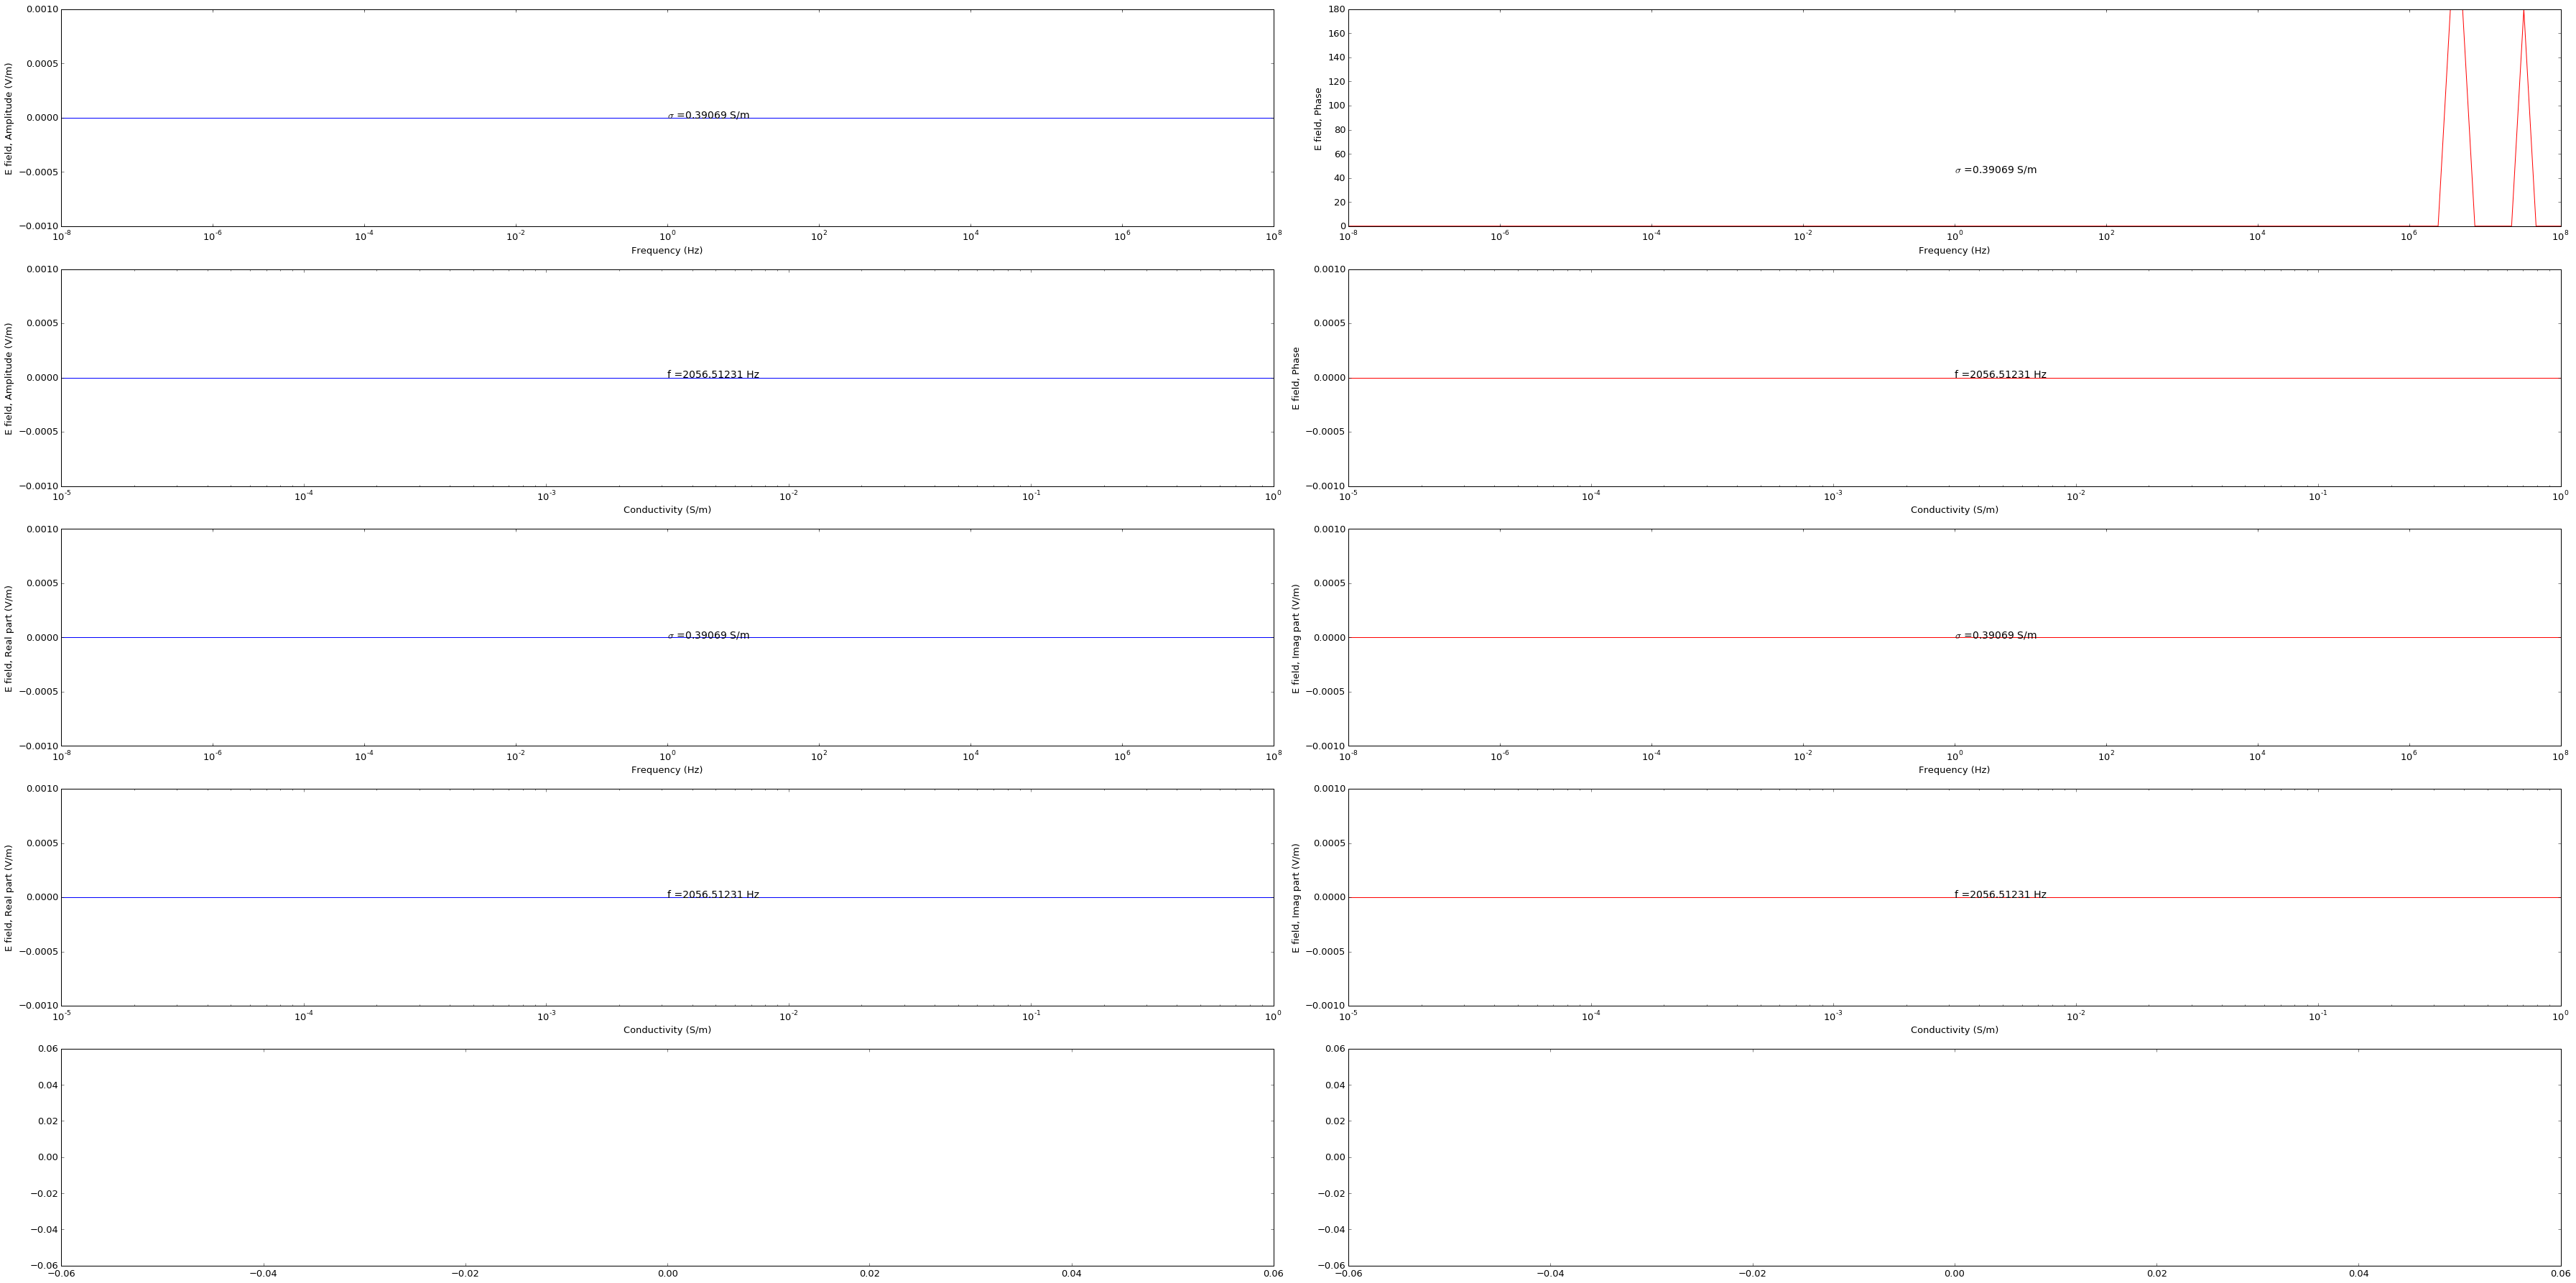

In [10]:
sigind=45
freqind=70

absloc=1.
coordloc=1.

fig = plt.figure(figsize=(50,25))
ax0 = plt.subplot(521)
ax1 = plt.subplot(522)
ax2 = plt.subplot(523)
ax3 = plt.subplot(524)
ax4 = plt.subplot(525)
ax5 = plt.subplot(526)
ax6 = plt.subplot(527)
ax7 = plt.subplot(528)
ax8 = plt.subplot(529)
ax9 = plt.subplot(5,2,10)

ax0,ax1 = self.plot_1D_AP_f_z(absloc,coordloc,ax0,ax1,sigind)
ax2,ax3 = self.plot_1D_AP_sig_z(absloc,coordloc,ax2,ax3,freqind)
ax4,ax5 = self.plot_1D_RI_f_z(absloc,coordloc,ax4,ax5,sigind)
ax6,ax7 = self.plot_1D_RI_sig_z(absloc,coordloc,ax6,ax7,freqind)
ax8 = self.plot_1D_phasor_f_z(absloc,coordloc,ax8,sigind)
ax9 = self.plot_1D_phasor_sig_z(absloc,coordloc,ax9,freqind)

plt.tight_layout()